<a href="https://colab.research.google.com/github/vishnudas08/pytorch-internals-mastery/blob/main/Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [ ]:
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Crate an Linear Regression model & data(also)


In [ ]:
# create known parameter

weight = 0.7
bias = 0.3
# create data
start =0
end =1
step =0.01
X=torch.arange(start, end, step)
y = X * weight +bias

In [ ]:
X,y

(tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
         0.0900, 0.1000, 0.1100, 0.1200, 0.1300, 0.1400, 0.1500, 0.1600, 0.1700,
         0.1800, 0.1900, 0.2000, 0.2100, 0.2200, 0.2300, 0.2400, 0.2500, 0.2600,
         0.2700, 0.2800, 0.2900, 0.3000, 0.3100, 0.3200, 0.3300, 0.3400, 0.3500,
         0.3600, 0.3700, 0.3800, 0.3900, 0.4000, 0.4100, 0.4200, 0.4300, 0.4400,
         0.4500, 0.4600, 0.4700, 0.4800, 0.4900, 0.5000, 0.5100, 0.5200, 0.5300,
         0.5400, 0.5500, 0.5600, 0.5700, 0.5800, 0.5900, 0.6000, 0.6100, 0.6200,
         0.6300, 0.6400, 0.6500, 0.6600, 0.6700, 0.6800, 0.6900, 0.7000, 0.7100,
         0.7200, 0.7300, 0.7400, 0.7500, 0.7600, 0.7700, 0.7800, 0.7900, 0.8000,
         0.8100, 0.8200, 0.8300, 0.8400, 0.8500, 0.8600, 0.8700, 0.8800, 0.8900,
         0.9000, 0.9100, 0.9200, 0.9300, 0.9400, 0.9500, 0.9600, 0.9700, 0.9800,
         0.9900]),
 tensor([0.3000, 0.3070, 0.3140, 0.3210, 0.3280, 0.3350, 0.3420, 0.3490, 0.3560,
         

In [ ]:
len(X)

100

In [ ]:
#Create an train/test split
train_split = int(0.8 * len(X))
X_train ,y_train =X[:train_split],y[:train_split]
X_test, y_test =X[train_split :], y[train_split :]
len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [ ]:
train_split

80

In [ ]:
def plot_predictions(train_data =X_train,
                     train_labels =y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions =None):
  plt.figure(figsize=(10,7))



  plt.scatter(train_data, train_labels, label='Traning data' )
  plt.scatter(test_data, test_labels , c='g', label= 'Test data')

  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', label='predictions')


  plt.legend(prop={'size':14})

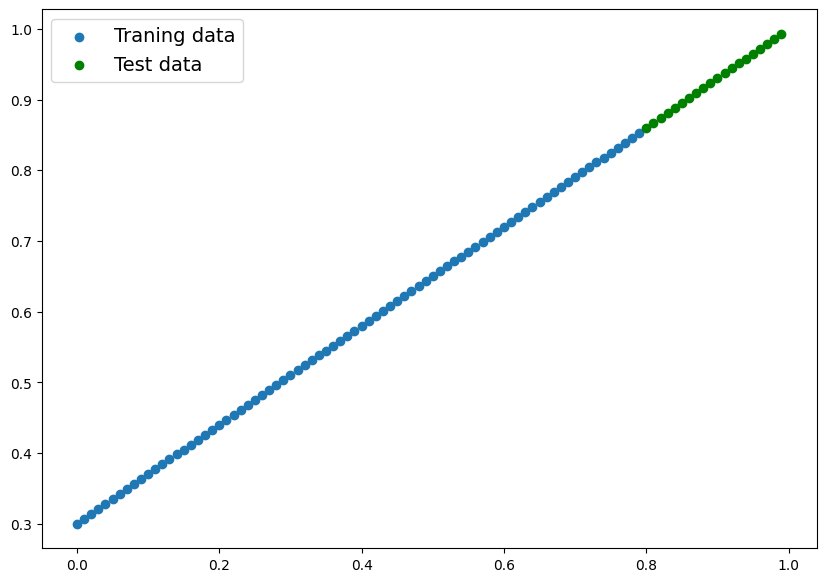

In [ ]:
plot_predictions()

#Build model

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, dtype =torch.float), requires_grad=True)

    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float),requires_grad=True)

    # forward pass
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias


In [ ]:
device ="cuda" if torch.cuda.is_available else "cpu"

In [ ]:
torch.manual_seed(0)
model_0 = LinearRegressionModel() # Create an Instance of the model
list(model_0.parameters())

[Parameter containing:
 tensor([1.5410], requires_grad=True),
 Parameter containing:
 tensor([-0.2934], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([1.5410])), ('bias', tensor([-0.2934]))])

In [ ]:
model_0.parameters()

<generator object Module.parameters at 0x7dbba2d1c9e0>

In [ ]:
print(model_0)

LinearRegressionModel()


In [ ]:
# make predictions with model
with torch.inference_mode():

  y_preds = model_0(X_test)

In [ ]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 20
Number of predictions made: 20
Predicted values:
tensor([0.9394, 0.9548, 0.9702, 0.9856, 1.0010, 1.0164, 1.0318, 1.0472, 1.0626,
        1.0781, 1.0935, 1.1089, 1.1243, 1.1397, 1.1551, 1.1705, 1.1859, 1.2013,
        1.2167, 1.2322])


In [ ]:
y_test

tensor([0.8600, 0.8670, 0.8740, 0.8810, 0.8880, 0.8950, 0.9020, 0.9090, 0.9160,
        0.9230, 0.9300, 0.9370, 0.9440, 0.9510, 0.9580, 0.9650, 0.9720, 0.9790,
        0.9860, 0.9930])

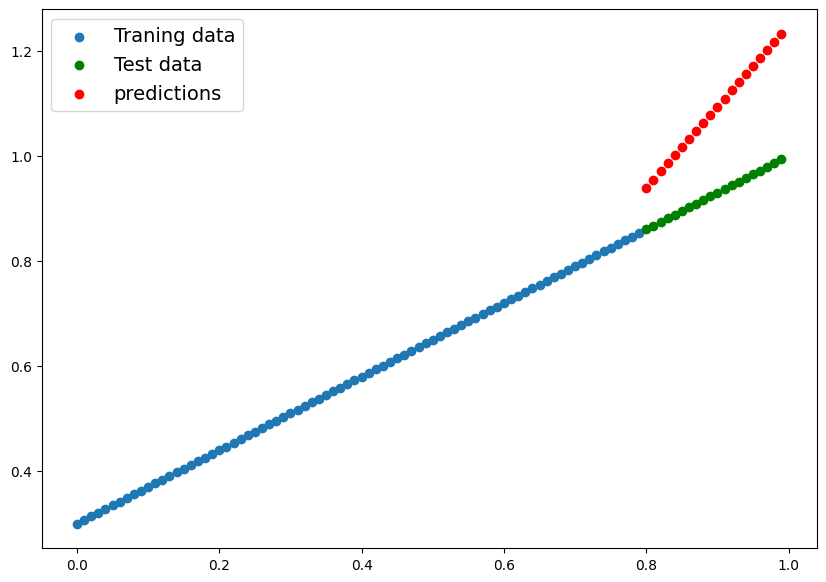

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
y_test - y_preds

tensor([-0.0794, -0.0878, -0.0962, -0.1046, -0.1130, -0.1214, -0.1298, -0.1382,
        -0.1466, -0.1551, -0.1635, -0.1719, -0.1803, -0.1887, -0.1971, -0.2055,
        -0.2139, -0.2223, -0.2307, -0.2392])

#training part

In [ ]:
import torch.optim as optim

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([1.5410], requires_grad=True),
 Parameter containing:
 tensor([-0.2934], requires_grad=True)]

In [ ]:
loss_fn= nn.L1Loss()
optimizer =optim.SGD(params=model_0.parameters(),lr=0.01)
epochs=60

In [ ]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 1000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 100 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss:.2f} ")

Epoch: 0 | MAE Train Loss: 0.2696320414543152 | MAE Test Loss: 0.17 
Epoch: 100 | MAE Train Loss: 0.15432901680469513 | MAE Test Loss: 0.35 
Epoch: 200 | MAE Train Loss: 0.12002043426036835 | MAE Test Loss: 0.28 
Epoch: 300 | MAE Train Loss: 0.08575029671192169 | MAE Test Loss: 0.20 
Epoch: 400 | MAE Train Loss: 0.051493048667907715 | MAE Test Loss: 0.12 
Epoch: 500 | MAE Train Loss: 0.01723557710647583 | MAE Test Loss: 0.04 
Epoch: 600 | MAE Train Loss: 0.009088901802897453 | MAE Test Loss: 0.00 
Epoch: 700 | MAE Train Loss: 0.009088901802897453 | MAE Test Loss: 0.00 
Epoch: 800 | MAE Train Loss: 0.009088901802897453 | MAE Test Loss: 0.00 
Epoch: 900 | MAE Train Loss: 0.009088901802897453 | MAE Test Loss: 0.00 


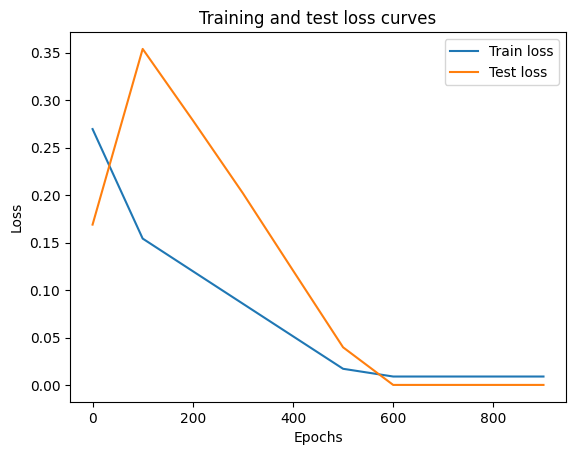

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weight': tensor([0.7089]), 'bias': tensor([0.3056])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [ ]:
# set the model eval mode
model_0.eval()
with torch.inference_mode():
  test_pred= model_0(X_test)
  test_loss= loss_fn(test_pred , y_test.type(torch.float))
  print(test_loss)


tensor(0.0135)


In [ ]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([0.8727, 0.8798, 0.8869, 0.8940, 0.9011, 0.9081, 0.9152, 0.9223, 0.9294,
        0.9365, 0.9436, 0.9507, 0.9578, 0.9649, 0.9719, 0.9790, 0.9861, 0.9932,
        1.0003, 1.0074])

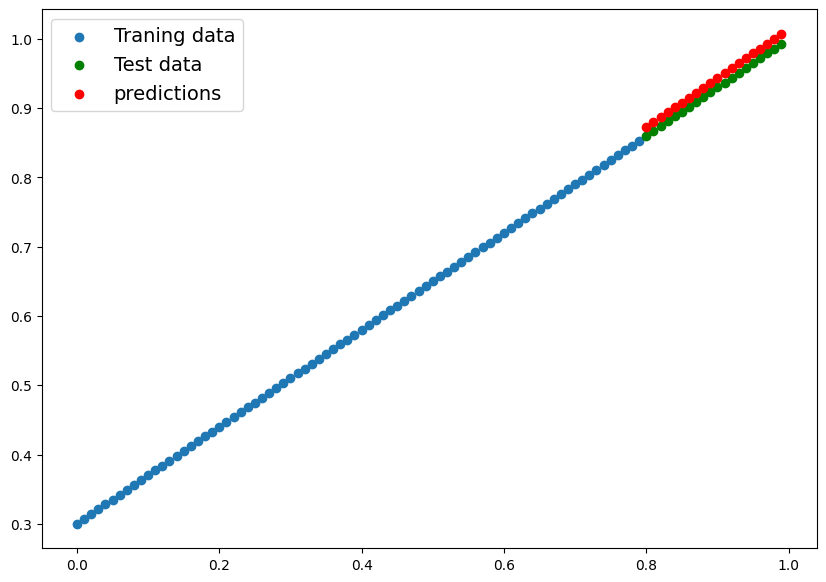

In [ ]:
plot_predictions(predictions=y_preds)

# saving pytorch model & reload it


In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/pytorch_workflow_model.pth
